# Machine Learning Assignment Notebook
Supervised, Unsupervised, and Reinforcement Learning

## 1. Setup and Imports

In [1]:

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


## 2. Load Dataset

In [1]:
# ---------------------------------------------------------
# PART 2 — LOAD DATASET + CLEAN + PREPROCESSOR
# ---------------------------------------------------------

import pandas as pd
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("kaushil268/disease-prediction-using-machine-learning")

# Load CSV
df = pd.read_csv(os.path.join(path, "Training.csv"))

print("Original shape:", df.shape)

# ---------------------------------------------------------
# 1. REMOVE USELESS COLUMNS (FIX ERROR)
# ---------------------------------------------------------

# Drop fully empty columns (like 'Unnamed: 133')
df = df.dropna(axis=1, how="all")

# Optional: drop unnamed columns if still exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

print("Shape after cleaning:", df.shape)

# ---------------------------------------------------------
# 2. SPLIT FEATURES AND TARGET
# ---------------------------------------------------------

X = df.drop(columns=["prognosis"])
y_class = df["prognosis"]

# Create regression target (numeric mapping)
severity_map = {disease: i for i, disease in enumerate(y_class.unique())}
y_reg = y_class.map(severity_map)

# ---------------------------------------------------------
# 3. IDENTIFY COLUMN TYPES
# ---------------------------------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))

# ---------------------------------------------------------
# 4. BUILD PREPROCESSING PIPELINES
# ---------------------------------------------------------

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# ---------------------------------------------------------
# 5. FIT PREPROCESSOR
# ---------------------------------------------------------

preprocessor.fit(X)

print("Preprocessor is ready. No warnings.")


Using Colab cache for faster access to the 'disease-prediction-using-machine-learning' dataset.
Original shape: (4920, 134)
Shape after cleaning: (4920, 133)
Numeric columns: 132
Categorical columns: 0
Preprocessor is ready. No warnings.


## 3. Explore Dataset

In [3]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0
prognosis,0


## 4. Clean Dataset

In [4]:

df = df.drop(columns=["Unnamed: 133"], errors="ignore")
df.shape


(4920, 133)

## 5. Define Features and Targets

In [5]:

X = df.drop(columns=["prognosis"])
y_class = df["prognosis"]

severity_map = {disease: i for i, disease in enumerate(y_class.unique())}
y_reg = y_class.map(severity_map)


## 6. Train/Test Split

In [6]:

X_temp, X_test, y_class_temp, y_class_test, y_reg_temp, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.15, stratify=y_class, random_state=42
)

X_train, X_val, y_class_train, y_class_val, y_reg_train, y_reg_val = train_test_split(
    X_temp, y_class_temp, y_reg_temp, test_size=0.1765, stratify=y_class_temp, random_state=42
)

print(len(X_train), len(X_val), len(X_test))


3443 739 738


## 7. Preprocessing

In [7]:

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", categorical_transformer, categorical_cols)
])

preprocessor.fit(X_train)

X_train_p = preprocessor.transform(X_train)
X_test_p = preprocessor.transform(X_test)


## 8. Regression

In [8]:

reg = LinearRegression()
reg.fit(X_train_p, y_reg_train)

y_pred = reg.predict(X_test_p)

print("MSE:", mean_squared_error(y_reg_test, y_pred))
print("R2:", r2_score(y_reg_test, y_pred))


MSE: 4.438669103013292
R2: 0.9682952206927622


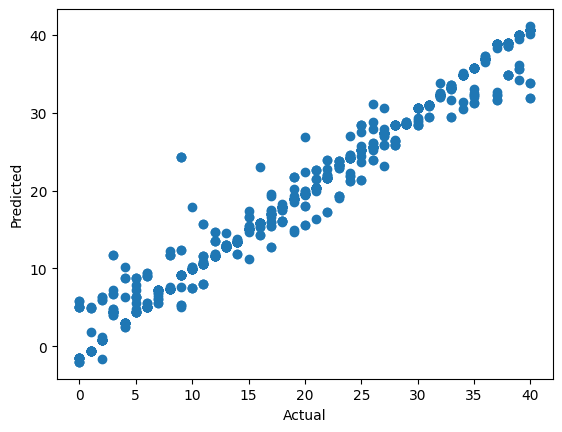

In [9]:

plt.scatter(y_reg_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


## 9. Classification

In [10]:

log = LogisticRegression(max_iter=500)
log.fit(X_train_p, y_class_train)

y_pred_log = log.predict(X_test_p)

print(accuracy_score(y_class_test, y_pred_log))
print(classification_report(y_class_test, y_pred_log))


1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        18
                                   Acne       1.00      1.00      1.00        18
                    Alcoholic hepatitis       1.00      1.00      1.00        18
                                Allergy       1.00      1.00      1.00        18
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        18
                    Chronic cholestasis       1.00      1.00      1.00        18
                            Common Cold       1.00      1.00      1.00        18
                       

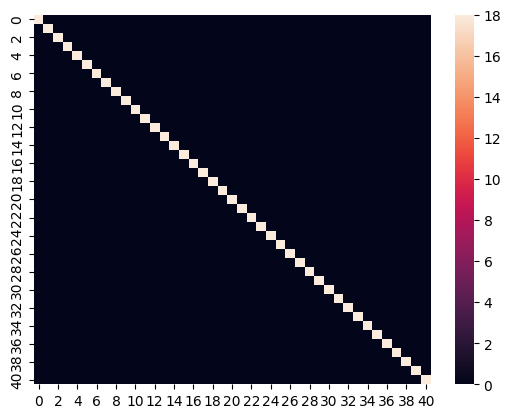

In [11]:

cm = confusion_matrix(y_class_test, y_pred_log)
sns.heatmap(cm)
plt.show()


In [12]:

tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train_p, y_class_train)

y_pred_tree = tree.predict(X_test_p)

print(accuracy_score(y_class_test, y_pred_tree))
print(classification_report(y_class_test, y_pred_tree))


0.21951219512195122
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.03      1.00      0.06        18
                                   AIDS       0.00      0.00      0.00        18
                                   Acne       0.00      0.00      0.00        18
                    Alcoholic hepatitis       0.00      0.00      0.00        18
                                Allergy       0.00      0.00      0.00        18
                              Arthritis       0.00      0.00      0.00        18
                       Bronchial Asthma       0.00      0.00      0.00        18
                   Cervical spondylosis       0.00      0.00      0.00        18
                            Chicken pox       0.00      0.00      0.00        18
                    Chronic cholestasis       0.00      0.00      0.00        18
                            Common Cold       1.00      1.00      1.00        18
       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 10. Clustering

In [13]:

X_all = preprocessor.transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_all)

print(silhouette_score(X_all, labels))
print(davies_bouldin_score(X_all, labels))


0.12217273935774736
2.379442368743296


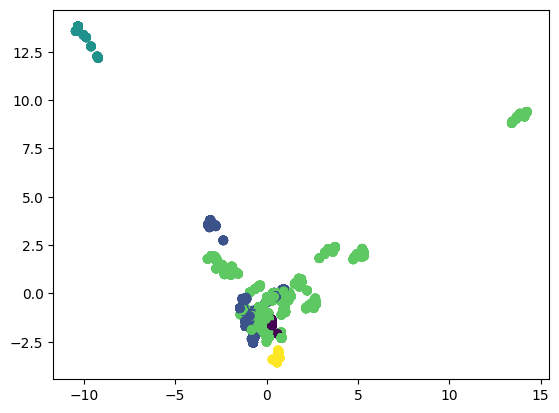

In [14]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()


## 11. t-SNE

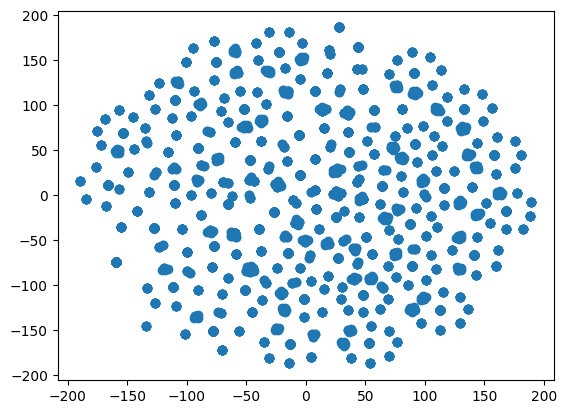

In [15]:

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_all)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()


## 12. Reinforcement Learning

In [16]:

class GridWorld:
    def __init__(self):
        self.rows, self.cols = 6, 6
        self.start = (0,0)
        self.goal = (5,5)
        self.obstacles = [(1,1),(2,2),(3,3)]
        self.state = self.start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        r,c = self.state
        if action == 0: r -= 1
        elif action == 1: r += 1
        elif action == 2: c -= 1
        elif action == 3: c += 1

        if r<0 or r>=6 or c<0 or c>=6:
            return self.state, -1, False
        if (r,c) in self.obstacles:
            return self.state, -5, False

        self.state = (r,c)
        if self.state == self.goal:
            return self.state, 10, True

        return self.state, -1, False


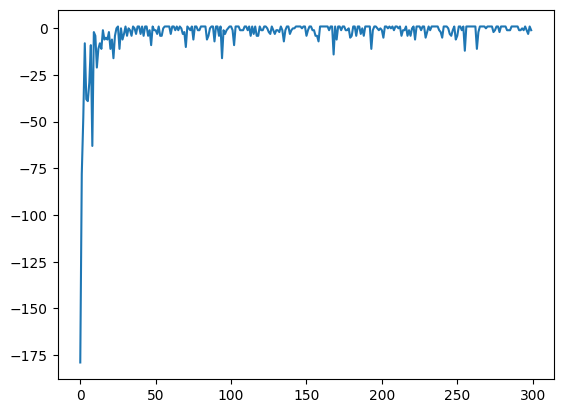

In [17]:

def q_learning(env, episodes=300):
    Q = np.zeros((6,6,4))
    rewards = []

    for _ in range(episodes):
        s = env.reset()
        total = 0
        done = False

        while not done:
            r,c = s
            if np.random.rand() < 0.1:
                a = np.random.randint(4)
            else:
                a = np.argmax(Q[r,c])

            ns, rew, done = env.step(a)
            nr,nc = ns

            Q[r,c,a] += 0.5*(rew + 0.95*np.max(Q[nr,nc]) - Q[r,c,a])
            s = ns
            total += rew

        rewards.append(total)

    return rewards

env = GridWorld()
r = q_learning(env)

plt.plot(r)
plt.show()
